In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.stats as ss
import statsmodels.api as sm
%matplotlib inline
plt.rcParams.update({'font.size': 14})

In [48]:
np.array(range(1,8))

array([1, 2, 3, 4, 5, 6, 7])

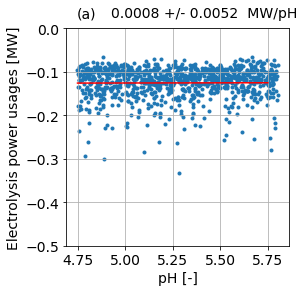

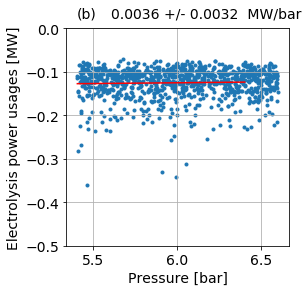

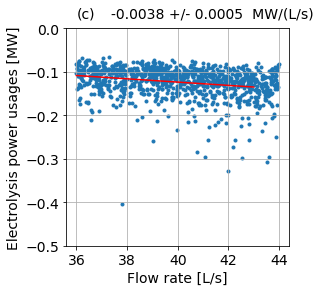

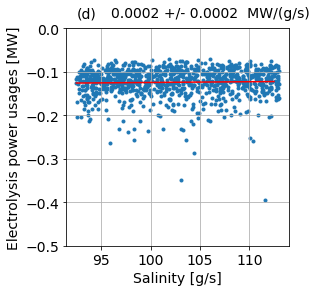

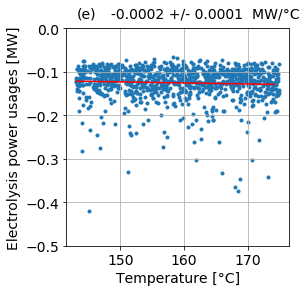

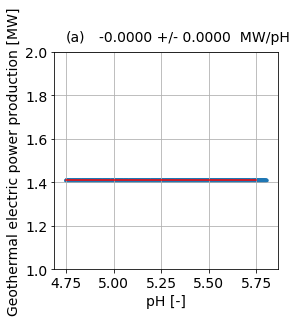

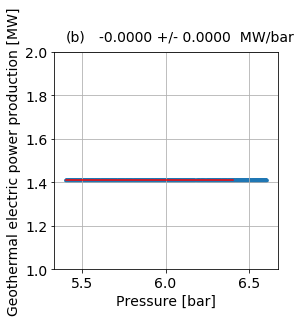

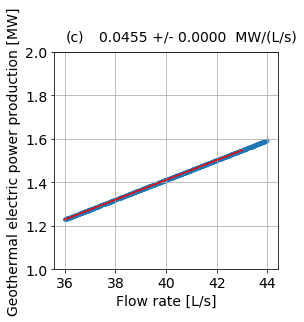

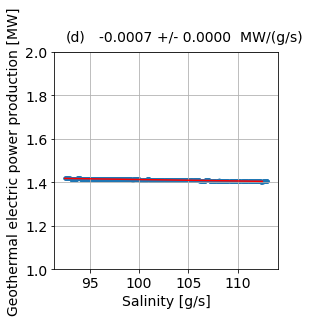

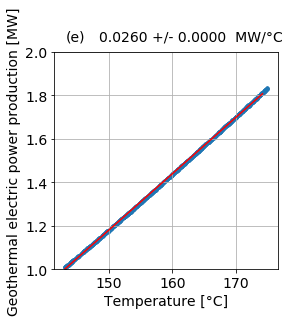

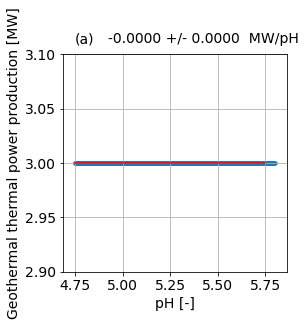

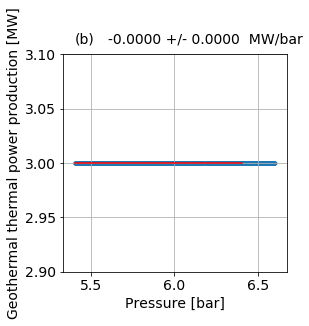

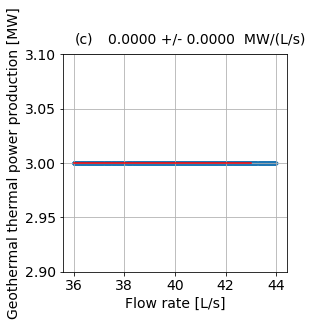

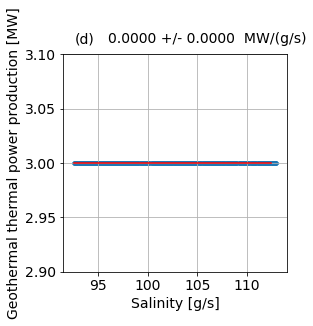

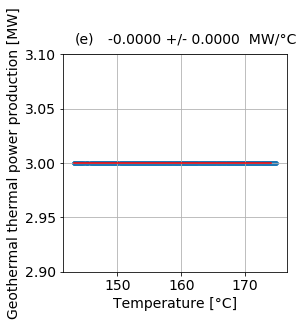

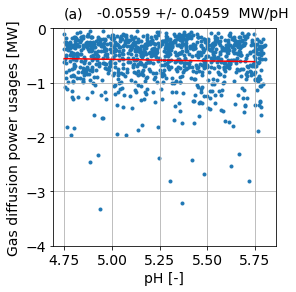

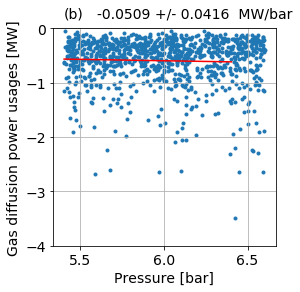

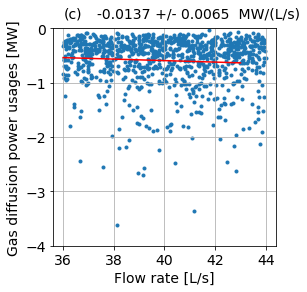

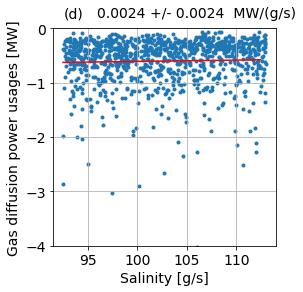

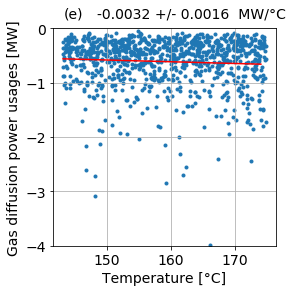

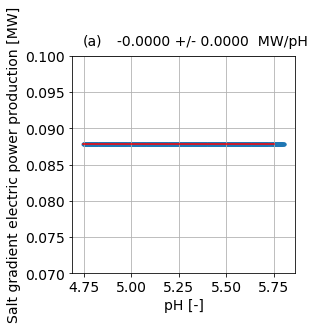

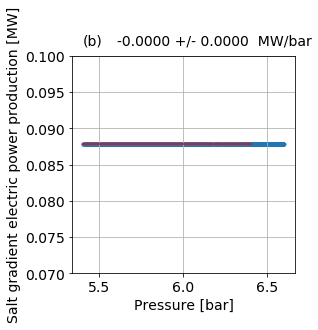

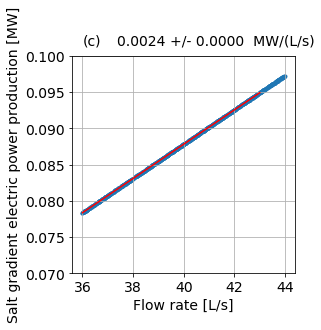

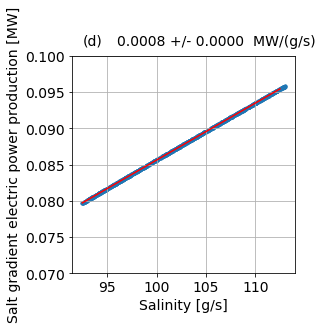

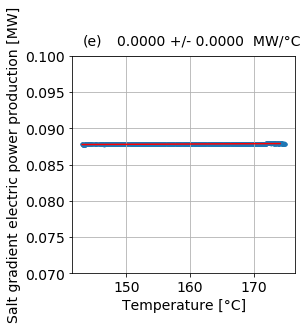

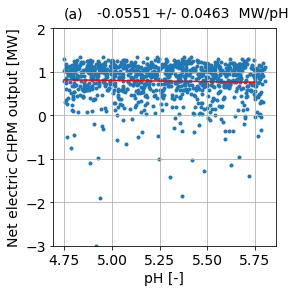

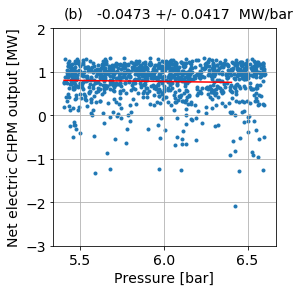

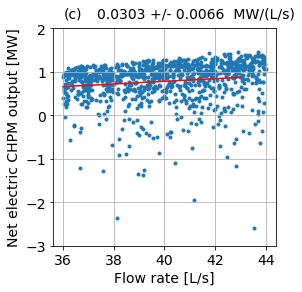

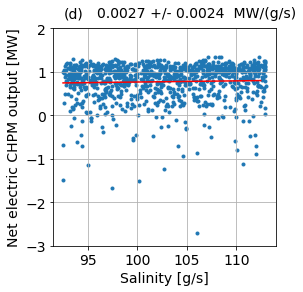

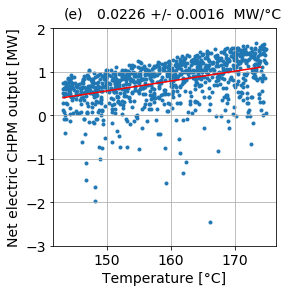

In [55]:
E4_var_dict={}

out_labels={'E3': "Electrolysis power usages [MW]",
            'E4': "Geothermal electric power production [MW]",
            'H4': "Geothermal thermal power production [MW]",
            'E5': "Gas diffusion power usages [MW]",
            'E6': "Salt gradient electric power production [MW]",
            'E':  "Net electric CHPM output [MW]"}

out_yranges={'E3': [-0.5,0],
            'E4': [1,2],
            'H4': [2.9,3.1],
            'E5': [-4,0],
            'E6': [0.07,0.1],
            'E':  [-3,2]}
param_labels={'t': "Temperature [°C]",
              'ph': "pH [-]",
              'p': "Pressure [bar]",   
              'q': "Flow rate [L/s]",
              's': "Salinity [g/s]",
              'cu': "Copper [mg/L]",             
             }
unit_labels={'t': "°C",
              'ph': "pH",
              'p': "bar",   
              'q': "(L/s)",
              's': "(g/s)",
              'cu': "(mg/L)",             
             }
filelist=[f for f in os.listdir(".\Landau") if f.endswith("1000.0.csv")]

for out_var in ['E3','E4','H4','E5','E6','E']:
    for (file,label) in zip(filelist,['(a)','(b)','(c)','(d)','(e)']):
        if file.endswith("1000.0.csv"):
            filepath=os.path.join(".\Landau", file)
            df=pd.read_csv(filepath)
            param=file.split('_')[3]
            if param and param != 'fixed':
                E4_var_dict[param]=[df[out_var].std()/abs(df[out_var].mean()),df[param].std()/df[param].mean()]
                ymax=df[out_var].mean()+df[out_var].std()*4
                ymin=df[out_var].mean()-df[out_var].std()*4
                
                fig,ax=plt.subplots(figsize=(4,4))
                ax.scatter(df[param].values,df[out_var].values,marker='.')
                ax.set_xlabel(param_labels[param])
                ax.set_ylabel(out_labels[out_var])
                ax.set_ylim(out_yranges[out_var])
                ax.text(0.05,1.05,label,transform=ax.transAxes)
                ax.grid()
                
                Y = df[out_var].values
                X = df[param].values
                X = sm.add_constant(X)
                model = sm.OLS(Y,X)
                results = model.fit()
                slope=results.params[1]
                intercept=results.params[0]
                line_x = np.arange(df[param].values.min(), df[param].values.max())
                line_y = slope*line_x + intercept
                ax.plot(line_x, line_y,color='red')
                ax.text(0.2,1.05,"{:.4f} +/- {:.4f}  MW/{}".format(results.params[1],results.bse[1],unit_labels[param]),transform=ax.transAxes)
            if param=='fixed':
                E4_var_dict[param]=[df[out_var].std()/abs(df[out_var].mean()),df['p'].std()/df['p'].mean()]
            plt.savefig("./Landau/Figures/sens_{}_{}_{}.png".format(out_var,param,label),bbox_inches='tight',dpi=200)

In [19]:
import operator as op
sorted(E4_var_dict.items(), key=op.itemgetter(0))

[('p', [0.5917066494824276, 0.058233085272341646]),
 ('ph', [0.5619780034882229, 0.05743695916195252]),
 ('q', [0.6117081559247456, 0.05698746464256738]),
 ('s', [0.588624881881965, 0.05849490801543777]),
 ('t', [0.6671415562315016, 0.05799830386406826])]